-<div style="width: 600px;">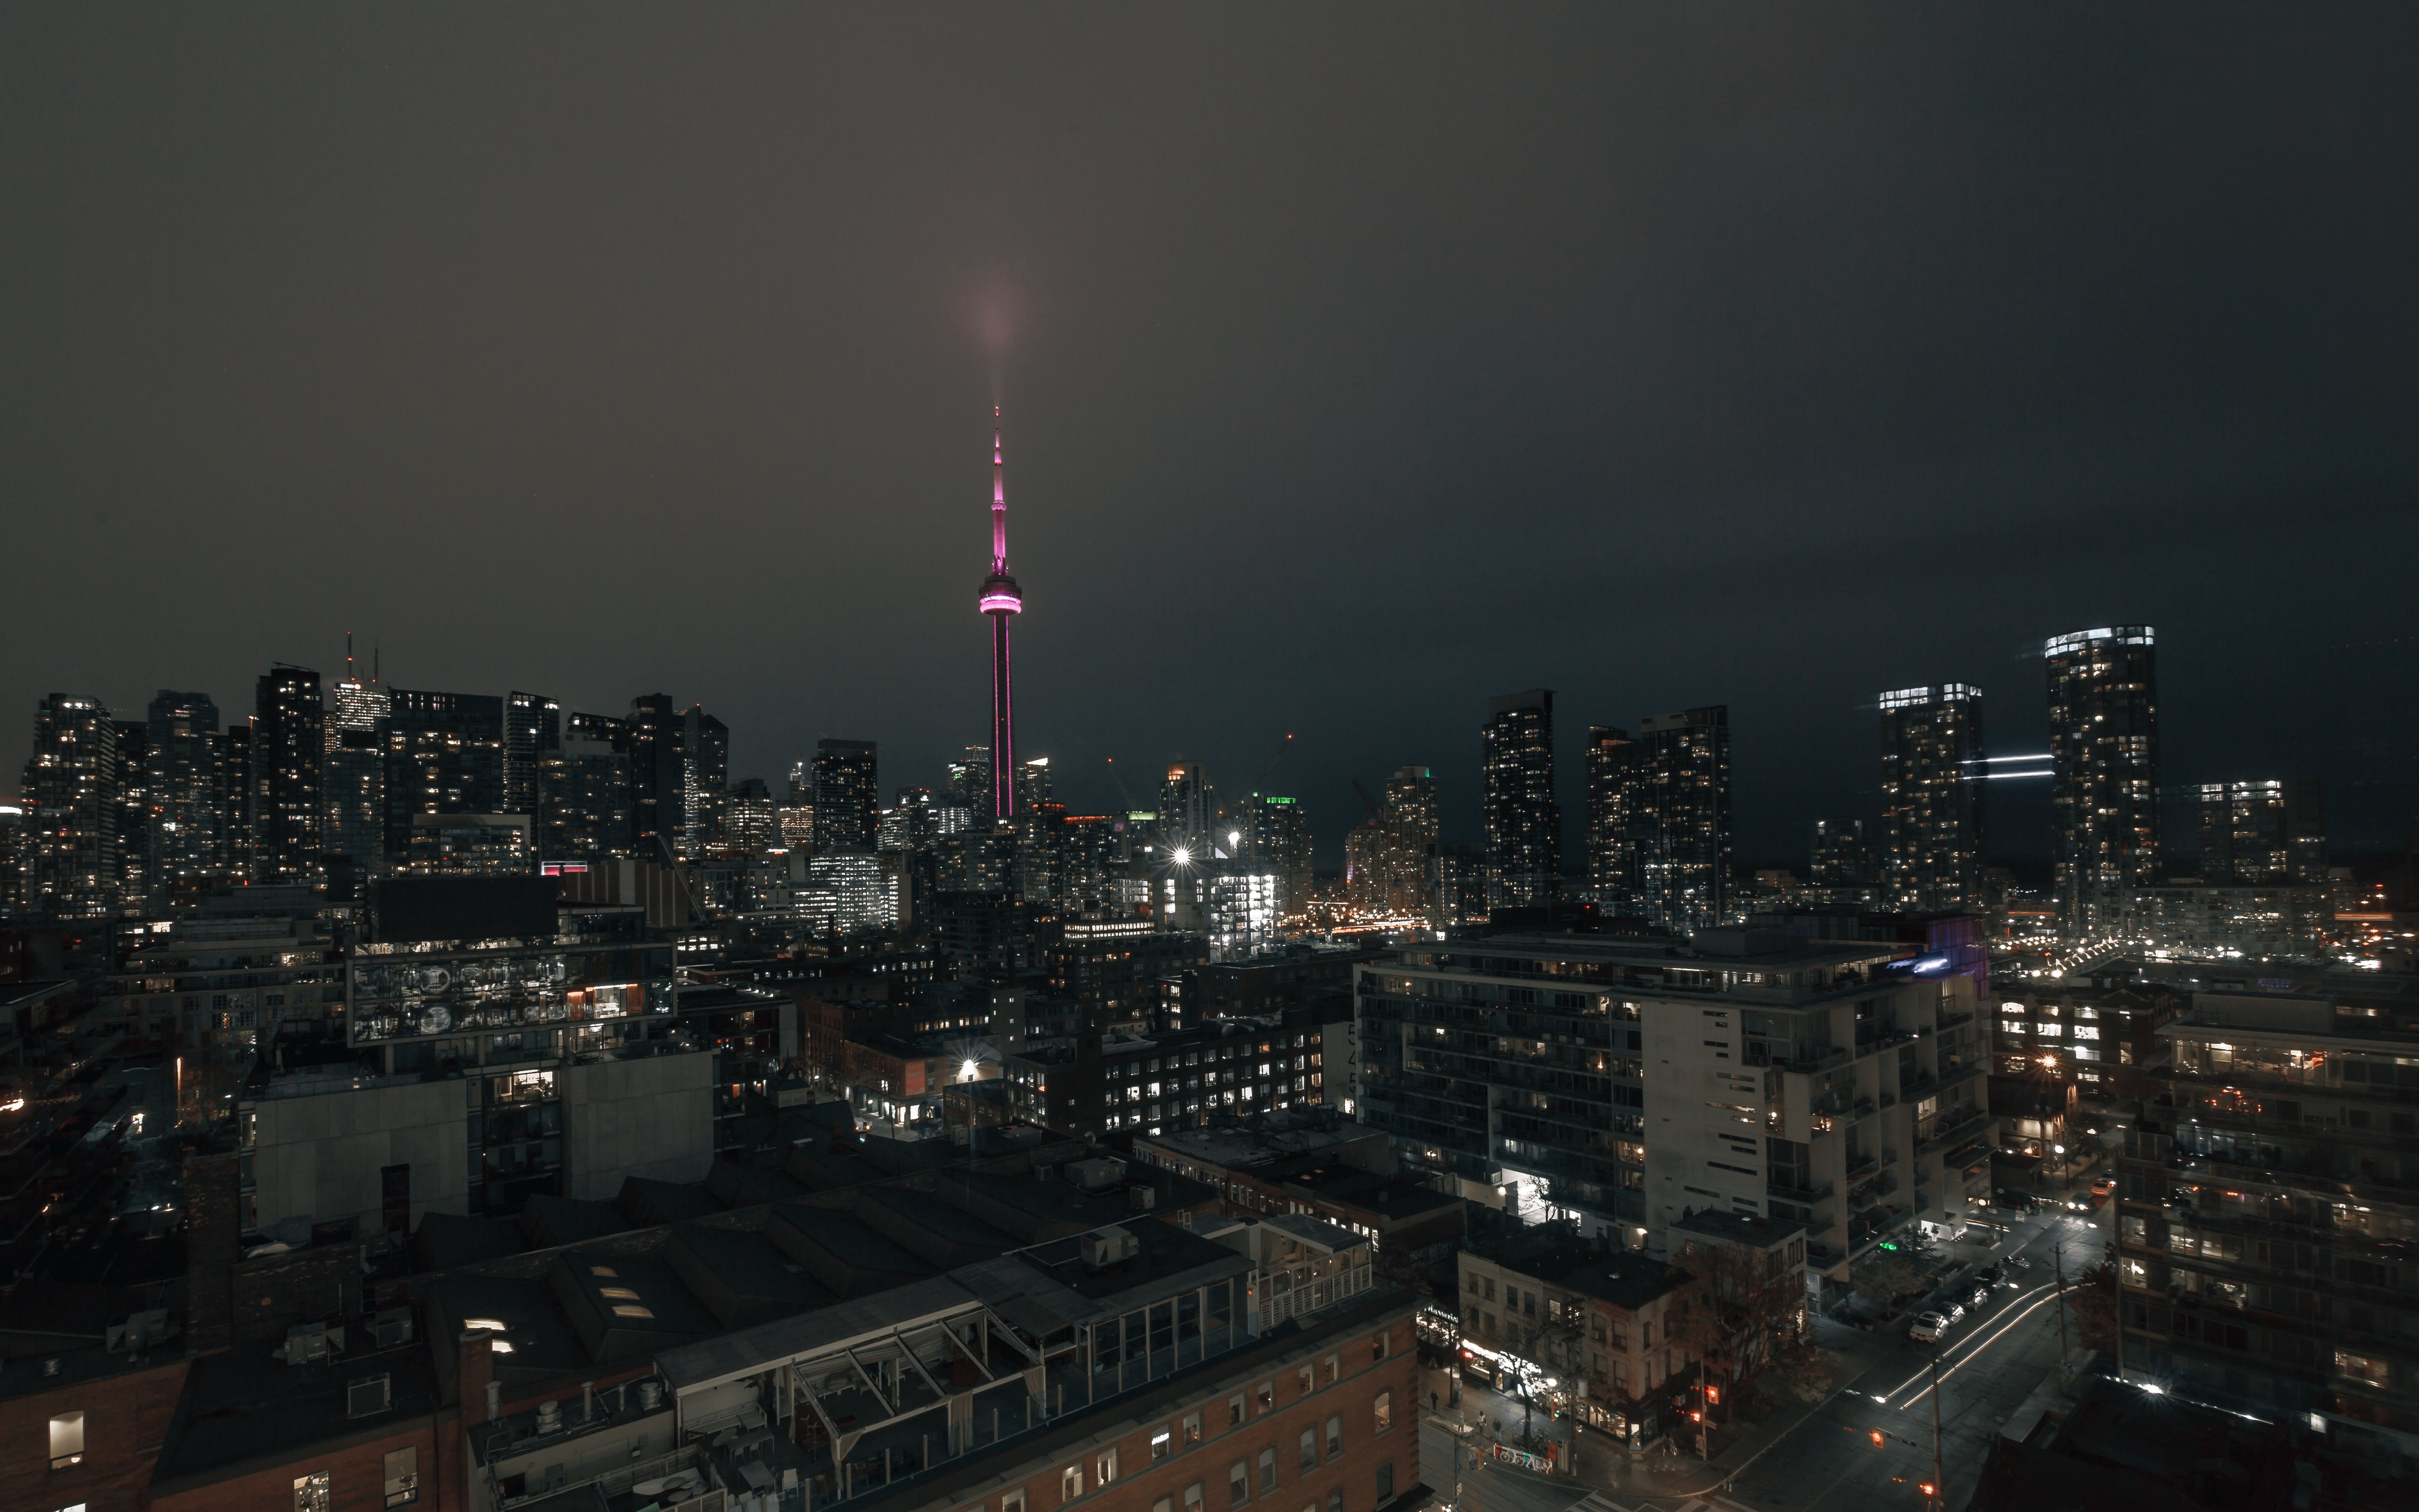</div>

#  Segment and Cluster Neighbourhoods in Toronto
### IBM/Coursera Applied Datascience Capstone

This Project Notebook covers Week 3 project assignments delivered in 3 parts. Each part is a course deliverable for the Applied Datascience Capstone Course and a grading requirement for IBM Data Science Professional Certification.

The purpose and benefit of the week 3 capstone assignment project is to provide students with a taste of what data scientists go through in real life when working with data. Some of the key goals of learning outcome are as follows:

- Learn about location data and different location data providers, such as Foursquare.

- Learn how to make RESTful API calls to the Foursquare API to retrieve data about venues in different neighborhoods around the world. 

- Learn how to be creative in situations where data are not readily available by scraping web data and parsing HTML code. 

- Utilize Python and its pandas library to manipulate data, to help refine skills for exploring and analyzing data. 

- Using Folium library to create maps of geospatial data and communicate results and findings.

- Apply K-means machine learning for clustering and clustering analysis of our data sets.

- Students post their capstone projects to showcase their work on https://github.com.

# Week 3 - Part 1:
In Part 1, we utilize a method for scraping Canada postal code information from wikipedia website,  load the data into a dataframe where data is then wrangled, cleaned, and transformed into a final dataframe, populated with Toronto postal codes, borough and neighborhood information.

Let's begin by building code to scrape following wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, to get our Postal Code, Borough, and Neighborhood data. Then we'll
wrangle and clean the data.

Our first task upon data retrieval is to evaluate each of 3 JSON data table objects we retrieved during scrape so we can analyze their data to designate which dataframe(s) we'll be pulling data from to merge into our main dataframe.

In [4]:
# Load url into data objects for analysis: 
import pandas as pd #library for data analysis
data = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")

In [5]:
# Our primary dataframe (df) inherits contents of data[0]
df = data[0]
df.head(5)

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


Summary:
- We retrieved all 3 JSON data objects from the wiki site. The first dataframe object data[0] created by html 
reader had the 3 column names we need. The data set is also populated with 180 rows of Toronto data.  
    
- data[1] and data[2] sets, our second and third imported dataframe objects we retrieved using read_html were
evaluated and found to contain Canadian province/state higher-level domain information which is out of scope for our Toronto City level model needs. Therefore data[1] and data[2] sets are of no use to us.

Next, we ensure Borough (town) cells with an assigned borough are processed. Cells where borough = 'Not assigned' are ignored.

In [6]:
#Identify cell counts for each Borough. 
# We see 77 Borough cells where name is 'Not Assigned.
print(df.Borough.value_counts())

Not assigned        77
North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
East York            5
East Toronto         5
York                 5
Mississauga          1
Name: Borough, dtype: int64


Let's remove the 77 Borough cells with 'Not Assigned' values

In [7]:
# Remove 'Not assigned" count data on Borough
df = df[df['Borough'] != 'Not assigned']
print(df.Borough.value_counts())

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
York                 5
East York            5
East Toronto         5
Mississauga          1
Name: Borough, dtype: int64


Summary:

- In the first print table above, we see 77 row counts found identified where Borough column has 'Not Assigned' row value.
- After applying our != operator above, the 77 'Not assigned' rows were successfully removed from Borough column.

Next task states when two or more Neighborhoods share the same postal code, we are to combine each Neighbourhood to a single neighborhood line that is comma delimited.

In [8]:
# I first perform a count sum of any df column duplicates by creating a lambda function. 
dup_chk = df.apply(lambda col: col.duplicated()).sum()
print(dup_chk)
print(df.head(5))

Postal Code       0
Borough          93
Neighbourhood     4
dtype: int64
  Postal Code           Borough                                Neighbourhood
2         M3A        North York                                    Parkwoods
3         M4A        North York                             Victoria Village
4         M5A  Downtown Toronto                    Regent Park, Harbourfront
5         M6A        North York             Lawrence Manor, Lawrence Heights
6         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government


Summary:
- The dup_chk lambda function above returned a 0 sum of Postal Code column duplicates, therefore no condition of two or more Neighborhoods sharing same Postal Code value exists within dataframe.
- Neighbourhood column above shows comma delimited Neighbourhoods already getting combined to a single line as desired, where multiple neighbourhoods share same Postal Code.  Combining appears to be getting handled by Postal Wiki moderators now (?) unless pandas is now doing the combining as a new default feature.
- In summary, no problem occurences were found, it's already working. Step 5 is complete.

In [9]:
#List all rows where Neighbourhood = 'Not assigned'. 
Num_Neighbourhood_Not_Assigneds = df[df['Neighbourhood'] == 'Not assigned']
Num_Neighbourhood_Not_Assigneds.head(5)

,Postal Code,Borough,Neighbourhood


Next task: If cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

Summary:
- No applicable 'Not assigned" Neighborhood cases found where Neighbourhood cells need to be assigned with Borough values.

Last step for Part 1, we use .shape method to print number of rows of dataframe

In [10]:
print(df.shape, 'rows x cols')

(103, 3) rows x cols


# This concludes Week 3 Part 1 Assignment

===================================================================

# Begin Week 3 Part 2 Assignment

### Part 2 of 3 Goal

- Tasks: We add postal geolocation data to our existing postal dataframe with Neighbourhoods and Borough.
- We scrape Geospatial data for Toronto postal codes from "http://cocl.us/Geospatial_data". 
- We merge the geodata into new dataframe joined on postal code.
- We conduct further analysis and data segmentation. 

Let's begin by reading in geospatial data of Toronto postal codes from "http://cocl.us/Geospatial_data" and store into a new geocode dataframe.

#### Build geodata dataframe  

In [11]:
#Load geocode information from http://cocl.us/Geospatial_data
geodata = pd.read_csv("http://cocl.us/Geospatial_data")
geodata.head(5)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Next, we merge geodata into our neigh_df (neighborhood) dataset joined on 'Postal Code' column.

In [12]:
neigh_df = pd.merge(df,geodata, how='inner', on=None)
neigh_df.head(5)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [13]:
#Print shape dimensions for our frame
print(neigh_df.shape)

(103, 5)


#### We will reuse above data for Part 3  clustering and mapping.

#### Validate: 
- We see 103 lines of data, 5 expected columns, with Latitude and Longitude fully populated
- We will keep part 1 and 2 notebook cells active so we can continue to reference our neigh_df frame in Part 3. 

# This concludes Week 3 Part 2 Assignment

===================================================================

# Begin Week 3 Part 3 Assignment

In [14]:
# Let's import all our required libraries. 
# Note: We comment out a few of these libraries once they are installed to our systems as install time can be slow.

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Let's first resume work on our Neighborhood dataset which we created and merged geocode data to during Part 2.

In [15]:
neigh_df.head(5)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


Explore first neighbourhood in dataframe

In [16]:
neigh_df.loc[0,'Neighbourhood'] #New neighbourhood dataframe

'Parkwoods'

In [17]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neigh_df['Borough'].unique()),
        neigh_df.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


In [18]:
# Let's rename our dataset to neighborhoods for clarity and lab-work code reuse convenience.

In [19]:
neighborhoods = neigh_df
neighborhoods.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


Next, let's get neighbourhoods latitude and longitude values

In [20]:
neigh_df_latitude = neigh_df.loc[0, 'Latitude'] # neighborhood latitude value
neigh_df_longitude = neigh_df.loc[0, 'Longitude'] #neighborhood longitude value
neigh_df_neighborhood = neigh_df.loc[0,'Neighbourhood'] #neighborhood features

print('Latitude and longitude values of {} are {}, {}.'.format(neigh_df_latitude, 
                                                               neigh_df_longitude, 
                                                               neigh_df_neighborhood))

Latitude and longitude values of 43.7532586 are -79.3296565, Parkwoods.


In [21]:
## Foursquare API 

This next section is where we configure our Foursquare API requests and communications.
- A Foursquare account is required. Free Foursquare developer accounts are available but only for low feature and volume usage users. 
- API credentials should not be shared. Suggested approach:
1. Make a copy of your notebook. 
2. Run kernel update on all the cells of the copy Notebook
3. Delete the API credential cells from your copy Notebook 
4. Run nbconvert from command line to convert file then post on github. Google nbconvert command options as there are several.

In [33]:

CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [34]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, ON are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, ON are 43.6534817, -79.3839347.


In [35]:
# For the search query, I set mid-downtown Toronto coordinates by calculating mean latitude and longitude 
# coordinates.  Alternative is to reference a physical address and city in the location field in next at next step.
meanlat = neigh_df.Latitude.mean()
meanlong = neigh_df.Longitude.mean()
MID_TORONTO = [meanlat, meanlong]

In [36]:
#We reference mean mid-toronto_downtown param above to derive geolocation as
#opposed to using the 'address' param
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(MID_TORONTO) #Defined from step above
latitude = location.latitude #uses mean mid-town location
longitude = location.longitude #uses mean mid-town location
print(latitude, longitude)

43.70468615 -79.39746395


In [37]:
# Next we create map of Toronto using latitude and longitude values and add markers to map and start exploring visuals.
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neigh_df['Latitude'], neigh_df['Longitude'], 
                                           neigh_df['Borough'], neigh_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

What you see in the map above is:
    1. Neighbourhood names can be viewed by making mouse selection on markers.
    2. Options exist for changing different styles of Markers.
    3. Marker colors can be changed to your RGB color preferences.
    4. Radius can be adjusted in map options to control marker size.
    5. Popup values can be changed on specific markers for html iframe popup mode. Fair amount of gotchas and known 
       issues and workarounds exist with that, however I have it working with plan to add key feature set values, 
       i.e., venue information.

## 1. Search for a specific venue category
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

This next section is an example of search query done for "Take out".
So, let's define a query to search for Italian food that is within 500 metres from the Conrad Hotel.

In [38]:
search_query = 'Take out'
radius = 500
print(search_query + ' .... OK!')

Take out .... OK!


In [39]:
#### Define the corresponding URL

In [40]:
radius=2000
limit=50
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=SOJZXT4G2WIN110GL40AM2ULYZHXBSRTNN5F3M22IHPDJZ2V&client_secret=QDFVARGC2XAYU1VV3FNGYNTGMGCREWUWP4FXEBXPL5OVTXCG&ll=43.70468615,-79.39746395&v=20180604&query=Take out&radius=2000&limit=30'

In [41]:
#### Send the GET Request and examine the results

In [42]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f2f5bcf94af785f94c01bf4'},
 'response': {'venues': [{'id': '4c953e4482b56dcb121ed7aa',
    'name': 'Tai Pan take out',
    'location': {'lat': 43.704902,
     'lng': -79.406633,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.704902,
       'lng': -79.406633}],
     'distance': 738,
     'cc': 'CA',
     'country': 'Canada',
     'formattedAddress': ['Canada']},
    'categories': [{'id': '4bf58dd8d48988d142941735',
      'name': 'Asian Restaurant',
      'pluralName': 'Asian Restaurants',
      'shortName': 'Asian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1596939206',
    'hasPerk': False},
   {'id': '4e8c8f4d469079cdfae7fff9',
    'name': 'The Output',
    'location': {'address': '2180 Yonge Street',
     'crossStreet': 'Eglinton',
     'lat': 43.70459379087675,
     'lng': -79.39745177846619,
     'labeledLatLngs': [{'label

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [43]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.name.head()

C:\Users\ericl\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


0            Tai Pan take out
1                  The Output
2                 Checked Out
3    2180 Yonge Street Output
4           The Pickle Barrel
Name: name, dtype: object



However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Midtown Toronto. So let's slice the original dataframe and create a new dataframe of the Midtown Toronto data.


In [44]:
#Figure out plan for neighbourhood value vs geo
#Midtown_Toronto_data = neigh_df['Borough'] == ['North York'].reset_index(drop=True)

neigh_df.Borough.head(10)

0          North York
1          North York
2    Downtown Toronto
3          North York
4    Downtown Toronto
5           Etobicoke
6         Scarborough
7          North York
8           East York
9    Downtown Toronto
Name: Borough, dtype: object

Now, let's get the top 100 venues that are in North York within a radius of 500 meters.

In [45]:
# type your answer here
import json, requests
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&near={},&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,'20200723',"North York",500,50)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=SOJZXT4G2WIN110GL40AM2ULYZHXBSRTNN5F3M22IHPDJZ2V&client_secret=QDFVARGC2XAYU1VV3FNGYNTGMGCREWUWP4FXEBXPL5OVTXCG&v=20200723&near=North York,&radius=500&limit=50'

In [46]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f2f5b4588d9f22c7a776039'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'geocode': {'what': '',
   'where': 'north york',
   'center': {'lat': 43.76681, 'lng': -79.4163},
   'displayString': 'North York, ON, Canada',
   'cc': 'CA',
   'geometry': {'bounds': {'ne': {'lat': 43.85873, 'lng': -79.296997},
     'sw': {'lat': 43.702629, 'lng': -79.557068}}},
   'slug': 'north-york-ontario-canada',
   'longId': '72057594044019040'},
  'headerLocation': 'North York',
  'headerFullLocation': 'North York',
  'headerLocationGranularity': 'city',
  'totalResults': 53,
  'suggestedBounds': {'ne': {'lat': 43.77078368255138,
    'lng': -79.41057980763519},
   'sw': {'lat': 43.76357387296184, 'lng': -79.41570705677928}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         

From the Foursquare lab in the previous module, we know that all the information is in the items key. Before we proceed,  let's borrow the get_category_type function from the Foursquare lab.


In [47]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [48]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

C:\Users\ericl\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,The Keg,Steakhouse,43.766579,-79.412131
1,Konjiki Ramen,Ramen Restaurant,43.766998,-79.412222
2,Toronto Centre for the Arts,Theater,43.766228,-79.414115
3,Starbucks,Coffee Shop,43.768353,-79.413046
4,Saryo,Café,43.766979,-79.412205
5,Satay Sate,Indonesian Restaurant,43.766690,-79.412100
6,Mel Lastman Square,Plaza,43.767701,-79.412975
7,Loblaws,Grocery Store,43.768722,-79.412101
8,Sushi Moto Sake & Wine Bar,Sushi Restaurant,43.763902,-79.411559
9,Aroma Espresso Bar,Café,43.769449,-79.413081


And how many venues were returned by Foursquare?

In [49]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

50 venues were returned by Foursquare.


## 2. Explore Neighborhoods in Toronto


#### Let's create a function to repeat the same process to all the neighborhoods in Midtown Toronto

In [50]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

nearby_venues


,name,categories,lat,lng
0,The Keg,Steakhouse,43.766579,-79.412131
1,Konjiki Ramen,Ramen Restaurant,43.766998,-79.412222
2,Toronto Centre for the Arts,Theater,43.766228,-79.414115
3,Starbucks,Coffee Shop,43.768353,-79.413046
4,Saryo,Café,43.766979,-79.412205
5,Satay Sate,Indonesian Restaurant,43.766690,-79.412100
6,Mel Lastman Square,Plaza,43.767701,-79.412975
7,Loblaws,Grocery Store,43.768722,-79.412101
8,Sushi Moto Sake & Wine Bar,Sushi Restaurant,43.763902,-79.411559
9,Aroma Espresso Bar,Café,43.769449,-79.413081


#### Now write the code to run the above function on each neighborhood and create a new dataframe called toronto_venues.

In [51]:
toronto_venues = getNearbyVenues(names=neigh_df['Neighbourhood'], 
                latitudes=neigh_df['Latitude'], 
                longitudes=neigh_df['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

#### Let's check the size of the resulting dataframe

In [52]:
print(toronto_venues.shape)
toronto_venues.head()

(1338, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,649 Variety,43.754513,-79.331942,Convenience Store
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


#### Let's check how many venues were returned for each neighborhood

In [53]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",23,23,23,23,23,23
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",27,27,27,27,27,27
Berczy Park,30,30,30,30,30,30
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",25,25,25,25,25,25
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",19,19,19,19,19,19


# 3. Analyze Each Neighborhood

In [54]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Soccer Field,Social Club,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Parkwoods,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [55]:
toronto_onehot.shape

(1338, 236)

#### Group by neighborhood and mean the other values 

In [56]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Soccer Field,Social Club,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0.000000,0.000,0.000000,0.0000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.00

In [57]:
toronto_grouped.shape

(95, 236)

#### Let's print each neighborhood along with the top 5 most common venues


In [58]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0  Latin American Restaurant  0.25
1                     Lounge  0.25
2             Breakfast Spot  0.25
3               Skating Rink  0.25
4               Liquor Store  0.00


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.25
1        Pharmacy  0.12
2     Coffee Shop  0.12
3  Sandwich Place  0.12
4             Pub  0.12


----Bathurst Manor, Wilson Heights, Downsview North----
               venue  freq
0               Bank  0.09
1        Coffee Shop  0.09
2  Convenience Store  0.04
3     Ice Cream Shop  0.04
4      Shopping Mall  0.04


----Bayview Village----
                 venue  freq
0                 Café  0.25
1  Japanese Restaurant  0.25
2                 Bank  0.25
3   Chinese Restaurant  0.25
4          Yoga Studio  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0  Italian Restaurant  0.11
1         Coffee Shop  0.07
2      Sandwich Place  0.07
3          Restaura

                  venue  freq
0        Massage Studio   0.2
1           Coffee Shop   0.2
2         Metro Station   0.2
3                   Bar   0.2
4  Caribbean Restaurant   0.2


----Old Mill South, King's Mill Park, Sunnylea, Humber Bay, Mimico NE, The Queensway East, Royal York South East, Kingsway Park South East----
                       venue  freq
0             Baseball Field   1.0
1                Yoga Studio   0.0
2  Latin American Restaurant   0.0
3               Liquor Store   0.0
4                     Lounge   0.0


----Parkdale, Roncesvalles----
                venue  freq
0      Breakfast Spot  0.14
1           Gift Shop  0.14
2             Dog Run  0.07
3        Dessert Shop  0.07
4  Italian Restaurant  0.07


----Parkview Hill, Woodbine Gardens----
          venue  freq
0   Pizza Place  0.22
1     Gastropub  0.11
2      Pharmacy  0.11
3          Café  0.11
4  Intersection  0.11


----Parkwoods----
               venue  freq
0               Park  0.33
1  Convenience S

#### Let's put our top 10 most common venues into a *pandas* dataframe

#### First, let's write a function to sort the venues in descending order.

In [59]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [60]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Skating Rink,Lounge,Breakfast Spot,Women's Store,College Rec Center,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run
1,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Pharmacy,Gym,Sandwich Place,Pub,Pool,Women's Store,Dessert Shop,Dance Studio
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Mobile Phone Shop,Supermarket,Ice Cream Shop,Sushi Restaurant,Restaurant,Deli / Bodega,Shopping Mall,Convenience Store
3,Bayview Village,Japanese Restaurant,Chinese Restaurant,Bank,Café,Women's Store,Dessert Shop,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore
4,"Bedford Park, Lawrence Manor East",Italian Restaurant,Sandwich Place,Coffee Shop,Restaurant,Breakfast Spot,Pharmacy,Butcher,Hobby Shop,Pub,Café


## 4. Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [61]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [62]:


# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = neigh_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')
toronto_merged = toronto_merged[np.isfinite(toronto_merged['Cluster Labels'])]
toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,Park,Convenience Store,Food & Drink Shop,Women's Store,Deli / Bodega,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.0,Hockey Arena,Coffee Shop,French Restaurant,Financial or Legal Service,Portuguese Restaurant,Pizza Place,Donut Shop,Dog Run,Distribution Center,Discount Store
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0.0,Coffee Shop,Park,Bakery,Breakfast Spot,Café,Theater,Pub,Restaurant,Chocolate Shop,Yoga Studio
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0.0,Clothing Store,Furniture / Home Store,Coffee Shop,Boutique,Event Space,Vietnamese Restaurant,Gift Shop,Accessories Store,Electronics Store,Eastern European Restaurant
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0.0,Coffee Shop,Diner,College Auditorium,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café,Portuguese Restaurant,Park


In [63]:
neighbourhoods = neigh_df
neighdf_grp = neighbourhoods.groupby(['Postal Code','Borough'])['Neighbourhood'].apply(', '.join).reset_index()
neighdf_grp.describe()

,Postal Code,Borough,Neighbourhood
count,103,103,103
unique,103,10,99
top,M5T,North York,Downsview
freq,1,24,4


Finally, let's visualize the resulting clusters

In [64]:
# create mapneigh
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examination of Clusters

## Cluster 1

In [65]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,0,Park,Convenience Store,Food & Drink Shop,Women's Store,Deli / Bodega,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run
1,North York,0,Hockey Arena,Coffee Shop,French Restaurant,Financial or Legal Service,Portuguese Restaurant,Pizza Place,Donut Shop,Dog Run,Distribution Center,Discount Store
2,Downtown Toronto,0,Coffee Shop,Park,Bakery,Breakfast Spot,Café,Theater,Pub,Restaurant,Chocolate Shop,Yoga Studio
3,North York,0,Clothing Store,Furniture / Home Store,Coffee Shop,Boutique,Event Space,Vietnamese Restaurant,Gift Shop,Accessories Store,Electronics Store,Eastern European Restaurant
4,Downtown Toronto,0,Coffee Shop,Diner,College Auditorium,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café,Portuguese Restaurant,Park
7,North York,0,Gym,Coffee Shop,Restaurant,Café,Beer Store,Japanese Restaurant,Italian Restaurant,Bubble Tea Shop,Supermarket,Construction & Landscaping
8,East York,0,Pizza Place,Pharmacy,Gym / Fitness Center,Athletics & Sports,Bank,Intersection,Café,Gastropub,Donut Shop,Dog Run
9,Downtown Toronto,0,Café,Clothing Store,Theater,Coffee Shop,Burrito Place,Sushi Restaurant,Fast Food Restaurant,Ramen Restaurant,Sporting Goods Shop,Japanese Restaurant
10,North York,0,Park,Japanese Restaurant,Pub,Sushi Restaurant,Dance Studio,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center
13,North York,0,Gym,Coffee Shop,Restaurant,Café,Beer Store,Japanese Restaurant,Italian Restaurant,Bubble Tea Shop,Supermarket,Construction & Landscaping


## Cluster 2

In [66]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,York,1,Park,Women's Store,Pool,Dance Studio,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store
52,North York,1,Park,Women's Store,Dance Studio,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store
64,York,1,Park,Women's Store,Dance Studio,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store
66,North York,1,Park,Convenience Store,Women's Store,Deli / Bodega,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center
85,Scarborough,1,Park,Playground,Women's Store,Dance Studio,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store
91,Downtown Toronto,1,Park,Playground,Trail,Curling Ice,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store


## Cluster 3

In [67]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Scarborough,2,Fast Food Restaurant,Women's Store,Deli / Bodega,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center,Discount Store


## Cluster 4

In [68]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,North York,3,Baseball Field,Food Service,Women's Store,Event Space,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center
101,Etobicoke,3,Baseball Field,Women's Store,Falafel Restaurant,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center


## Cluster 5

In [69]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Scarborough,4,Bar,Women's Store,Falafel Restaurant,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Dog Run,Distribution Center


# This concludes Week 3 Part 3 Assignment

Thank you for your review!!

We continue examination of into Part 3 Next.


This notebook is part of a course on Coursera called Applied Data Science Capstone. If you accessed this notebook outside the course, you can take this course online by clicking [here](http://cocl.us/DP0701EN_Coursera_Week3_LAB2).